In [1]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re
import requests
import spacy
import unicodedata
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

r = requests.get('http://www.gutenberg.org/files/11/11-0.txt')
r.encoding = 'utf-8'

In [2]:
if r.status_code == 200:
    data = r.text

In [3]:
data

'\ufeffThe Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Alice’s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: January, 1991 [eBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Arthur DiBianca and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAlice’s Adventures in Wonderland\r

#### (1) Find the following:

* unigram
* bi-gram
* tri-gram


Bonus: Word Cloud

In [4]:
def basic_clean(text):
    """
    A simple function to clean up the data. All the words that are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    
    words = re.sub(r'[^\w\s]', '', text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [5]:
clean_data = basic_clean(data)
clean_data

['project',
 'gutenberg',
 'ebook',
 'alices',
 'adventure',
 'wonderland',
 'lewis',
 'carroll',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'united',
 'state',
 'part',
 'world',
 'cost',
 'almost',
 'restriction',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'reuse',
 'term',
 'project',
 'gutenberg',
 'license',
 'included',
 'ebook',
 'online',
 'wwwgutenbergorg',
 'located',
 'united',
 'state',
 'check',
 'law',
 'country',
 'located',
 'using',
 'ebook',
 'title',
 'alices',
 'adventure',
 'wonderland',
 'author',
 'lewis',
 'carroll',
 'release',
 'date',
 'january',
 '1991',
 'ebook',
 '11',
 'recently',
 'updated',
 'october',
 '12',
 '2020',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf8',
 'produced',
 'arthur',
 'dibianca',
 'david',
 'widger',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'alices',
 'adventure',
 'wonderland',
 'illustration',
 'alices',
 'adventure',
 'wonderland',
 'lewis',
 'carroll',
 'millennium',
 'fulcrum',
 'edition',
 '

In [10]:
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
 
print("1-gram: ", extract_ngrams(' '.join(clean_data), 1))

1-gram:  ['project', 'gutenberg', 'ebook', 'alices', 'adventure', 'wonderland', 'lewis', 'carroll', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'term', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergorg', 'located', 'united', 'state', 'check', 'law', 'country', 'located', 'using', 'ebook', 'title', 'alices', 'adventure', 'wonderland', 'author', 'lewis', 'carroll', 'release', 'date', 'january', '1991', 'ebook', '11', 'recently', 'updated', 'october', '12', '2020', 'language', 'english', 'character', 'set', 'encoding', 'utf8', 'produced', 'arthur', 'dibianca', 'david', 'widger', 'start', 'project', 'gutenberg', 'ebook', 'alices', 'adventure', 'wonderland', 'illustration', 'alices', 'adventure', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', '30', 'content', 'chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tear', 'cha

In [18]:
unigrams_series = (pd.Series(extract_ngrams(' '.join(clean_data), 3))).value_counts()[:10]
unigrams_series

said mock turtle                  20
gutenbergtm electronic work       18
project gutenbergtm electronic    18
literary archive foundation       13
gutenberg literary archive        13
project gutenberg literary        13
project gutenbergtm work          10
said march hare                    9
project gutenbergtm license        8
poor little thing                  6
dtype: int64

<AxesSubplot:>

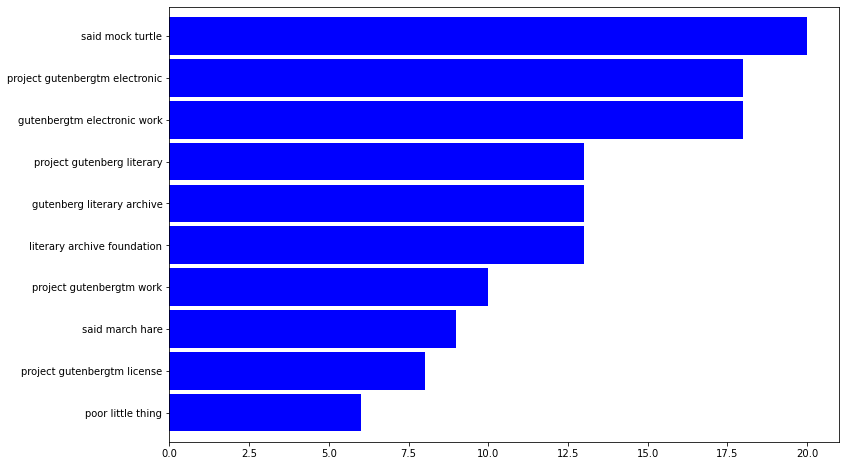

In [19]:
unigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

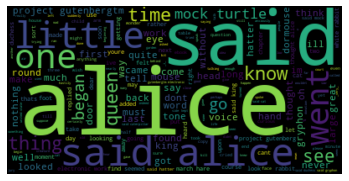

In [24]:
wordcloud = WordCloud().generate(' '.join(clean_data))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### (2) Find the top 20 most important words

In [31]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,norm='l2',encoding='utf-8',ngram_range=(1,1), 
                        stop_words='english')

# convert training data to bag of words
response = tfidf.fit_transform(clean_data)
response

<14551x2845 sparse matrix of type '<class 'numpy.float64'>'
	with 12518 stored elements in Compressed Sparse Row format>

In [32]:
feature_array = np.array(tfidf.get_feature_names())
feature_array

array(['11', '110txt', '110zip', ..., 'youve', 'zealand', 'zigzag'],
      dtype='<U40')

In [35]:
tfidf_sorting = np.argsort(response.toarray()).flatten()[::-1]

top_words = feature_array[tfidf_sorting][:20]

In [36]:
top_words

array(['ebooks', 'zigzag', 'fallen', 'father', 'fat', 'faster', 'fast',
       'fashion', 'farther', 'farmyardwhile', 'farmer', 'far', 'fanning',
       'fanned', 'fancywhos', 'fancying', 'fancy', 'fancied', 'fan',
       'family'], dtype='<U40')